Training set size: 80 samples
Testing set size: 20 samples


Model Evaluation
Mean Absolute Error (MAE): 280,484.03
Mean Squared Error (MSE): 99,161,945,888.97
R-squared (R²): 0.98




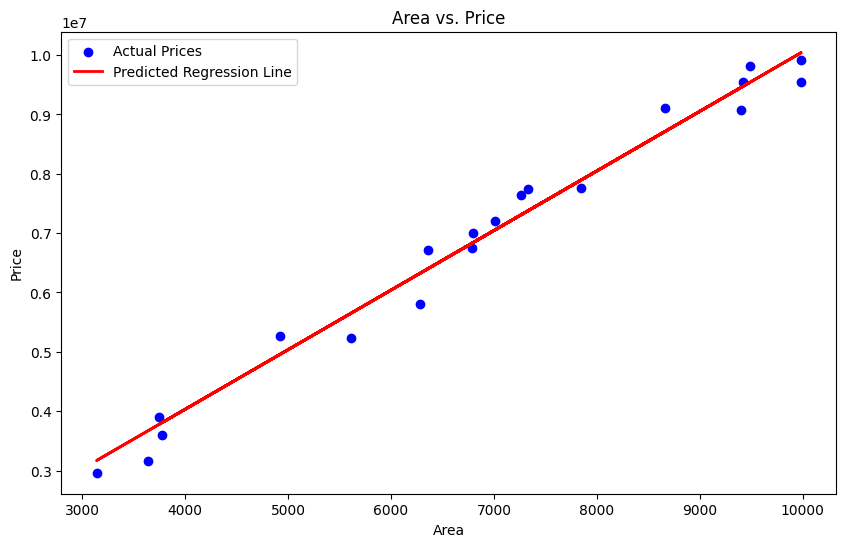

Model Interpretation
Coefficient (slope): 1004.21
Intercept: 14823.77

This model predicts that for each one-unit increase in 'area',
the 'price' increases by approximately $1,004.21.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('/content/Housing.csv')
data = {'area': np.random.randint(3000, 10000, 100),
            'price': np.random.randint(3000000, 13000000, 100)}
df = pd.DataFrame(data)
df['price'] = df['area'] * 1000 + np.random.randint(-500000, 500000, 100)

feature_column = 'area'
target_column = 'price'

df_simple = df[[feature_column, target_column]].dropna()


#Split Data into Train-Test Sets
X = df_simple[[feature_column]]
y = df_simple[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("\n" + "="*50 + "\n")

# Fit a Linear Regression Model

model = LinearRegression()

model.fit(X_train, y_train)


# Evaluate the Model
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("\n" + "="*50 + "\n")


# Plot Regression Line and Interpret Coefficients
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Regression Line')
plt.title('Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()


coefficient = model.coef_[0]
intercept = model.intercept_

print("Model Interpretation")
print(f"Coefficient (slope): {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"\nThis model predicts that for each one-unit increase in '{feature_column}',")
print(f"the '{target_column}' increases by approximately ${coefficient:,.2f}.")